In [48]:
import pandas as pd
import zipfile

# Open the zip file
with zipfile.ZipFile("titanic.zip") as z:
    # Get a list of files in the zip
    file_list = z.namelist()

    # Assuming you want to read 'train.csv', adjust if needed
    csv_file_name = 'train.csv'

    # Check if the desired file is in the zip
    if csv_file_name in file_list:
        # Read the CSV file from the zip
        with z.open(csv_file_name) as f:
            train_data = pd.read_csv(f)
            print(train_data.head())
    else:
        print(f"File '{csv_file_name}' not found in the zip archive.")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    with zipfile.ZipFile("titanic.zip") as z:
        file_list = z.namelist()
        csv_file_name = 'train.csv'
        if csv_file_name in file_list:
            with z.open(csv_file_name) as f:
                titanic_data = pd.read_csv(f)
        else:
            raise FileNotFoundError(f"File '{csv_file_name}' not found in the zip archive.")
except FileNotFoundError as e:
    print(f"Error: {e}")

    try:
        titanic_data = pd.read_csv('titanic.csv')
    except FileNotFoundError:
        print("Error: Could not find 'titanic.csv' or 'titanic.zip' with 'train.csv' inside.")
        exit(1)


In [52]:
# Data Cleaning
#1.Handling Missing Data

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# 2. Feature Engineering

titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'IsAlone'] = 1

# 3. Drop irrelevant columns

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_columns = titanic_data.columns  # Get a list of existing columns

if all(col in existing_columns for col in columns_to_drop):
    titanic_data = titanic_data.drop(columns_to_drop, axis=1)
else:
    missing_columns = [col for col in columns_to_drop if col not in existing_columns]
    print(f"Error: The following columns were not found in the DataFrame: {missing_columns}")

titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

<ipython-input-52-fb45ca887c82>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-52-fb45ca887c82>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [53]:
print(titanic_data.describe())

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  
mean    32.204208    1.904602    0.602694  
std     49.693429    1.613459    0.489615  
min      0.000000    1.000000    0.000000  
25%      7.910400    1.000000    0.000000  
50%   

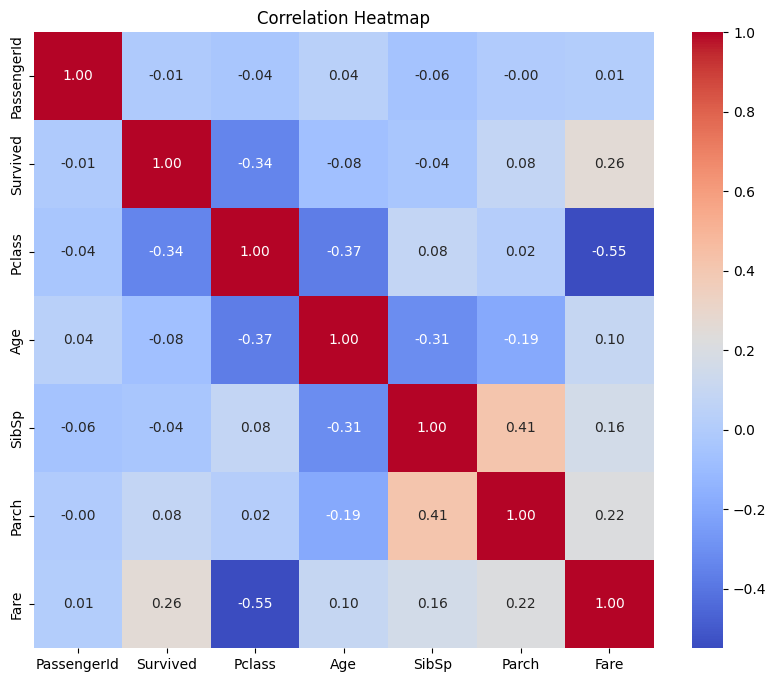

In [54]:
# Correlation Matrix
numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


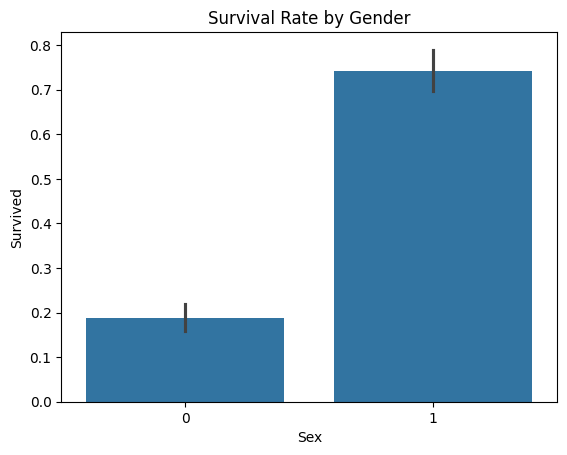

In [55]:
# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

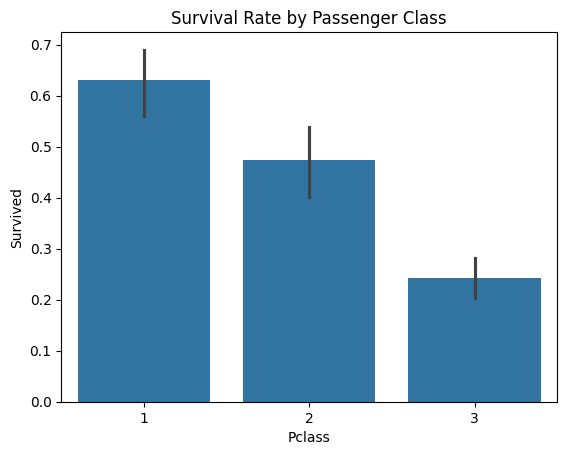

In [56]:
# Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

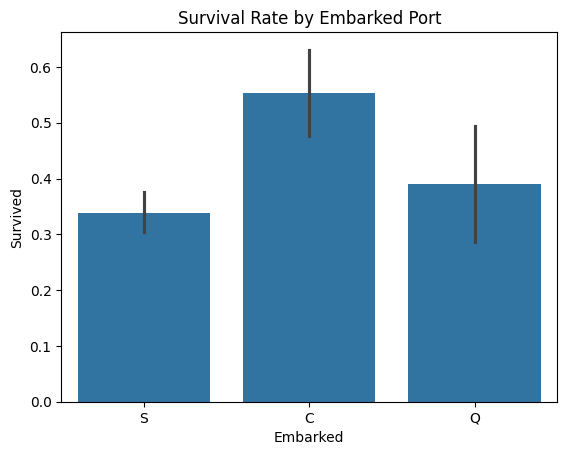

In [57]:
# Survival Rate by Embarked Port
sns.barplot(x='Embarked', y='Survived', data=titanic_data)
plt.title('Survival Rate by Embarked Port')
plt.show()

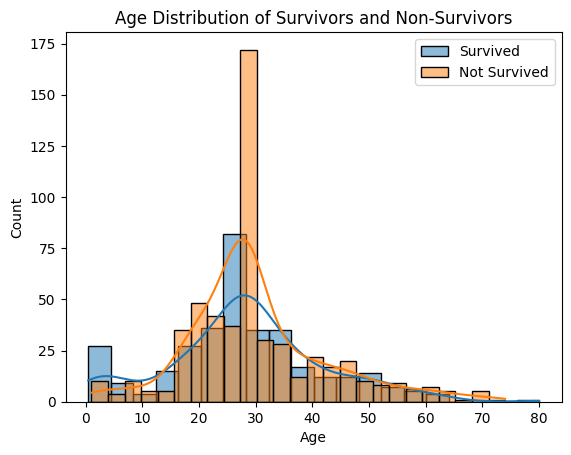

In [58]:
# Age Distribution of Survivors and Non-Survivors
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'], label='Survived', kde=True)
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'], label='Not Survived', kde=True)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend()
plt.show()

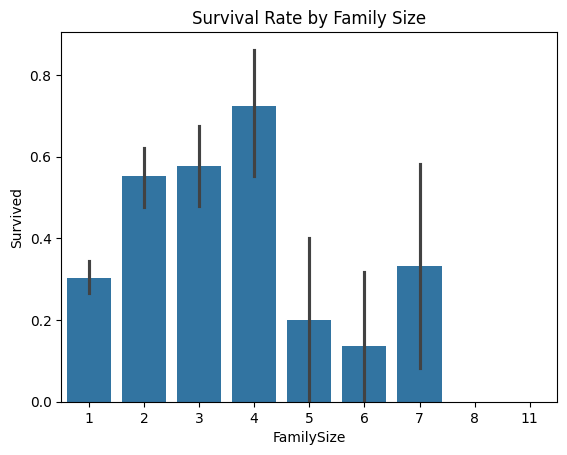

In [59]:
# Survival Rate by Family Size
sns.barplot(x='FamilySize', y='Survived', data=titanic_data)
plt.title('Survival Rate by Family Size')
plt.show()

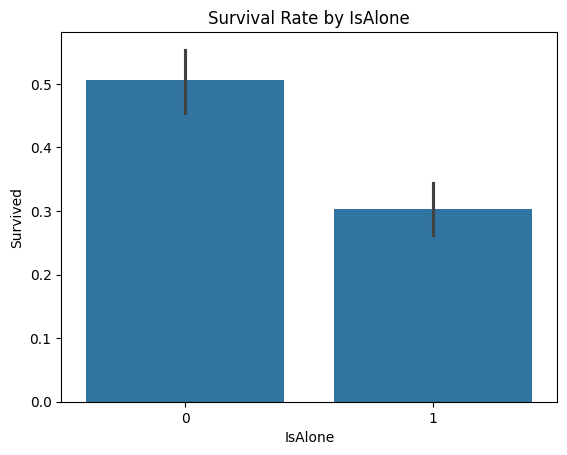

In [60]:
# Survival Rate by IsAlone
sns.barplot(x='IsAlone', y='Survived', data=titanic_data)
plt.title('Survival Rate by IsAlone')
plt.show()

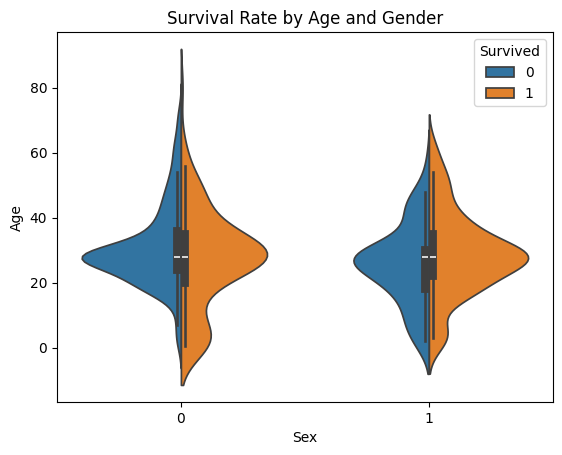

In [62]:
# Survival Rate by Age and Gender
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data, split=True)
plt.title('Survival Rate by Age and Gender')
plt.show()

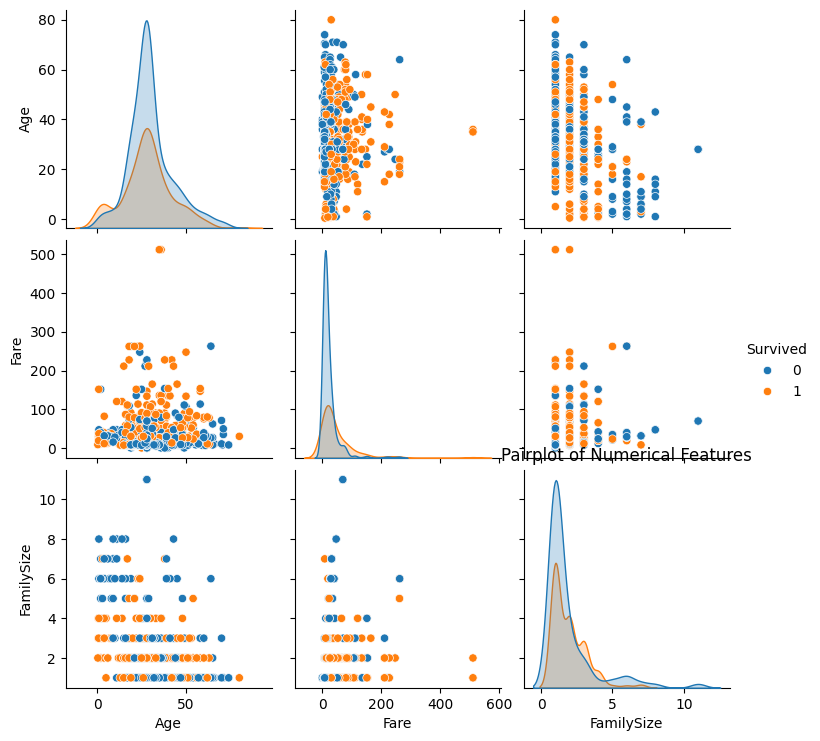

In [63]:
# Pairplot of Numerical Features
sns.pairplot(titanic_data[['Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived')
plt.title('Pairplot of Numerical Features')
plt.show()

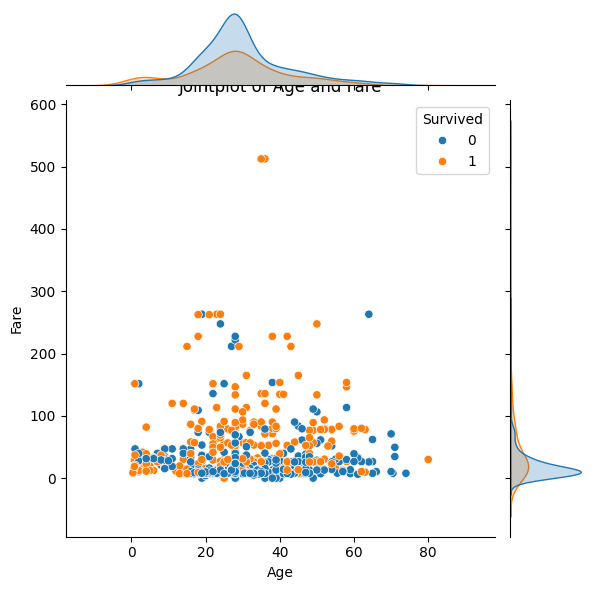

In [64]:
# Jointplot of Age and Fare
sns.jointplot(x='Age', y='Fare', data=titanic_data, kind='scatter', hue='Survived')
plt.title('Jointplot of Age and Fare')
plt.show()


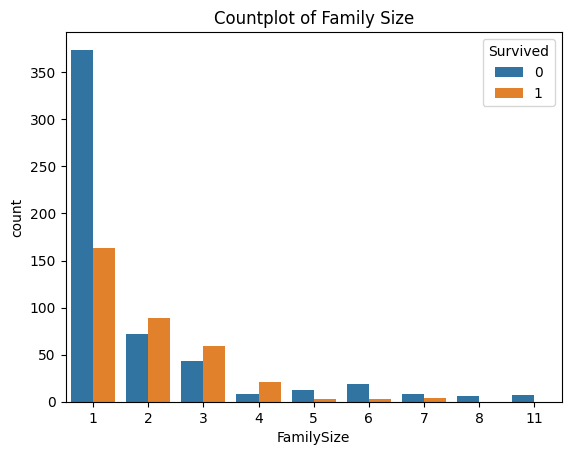

In [65]:
# Countplot of Family Size
sns.countplot(x='FamilySize', data=titanic_data, hue='Survived')
plt.title('Countplot of Family Size')
plt.show()

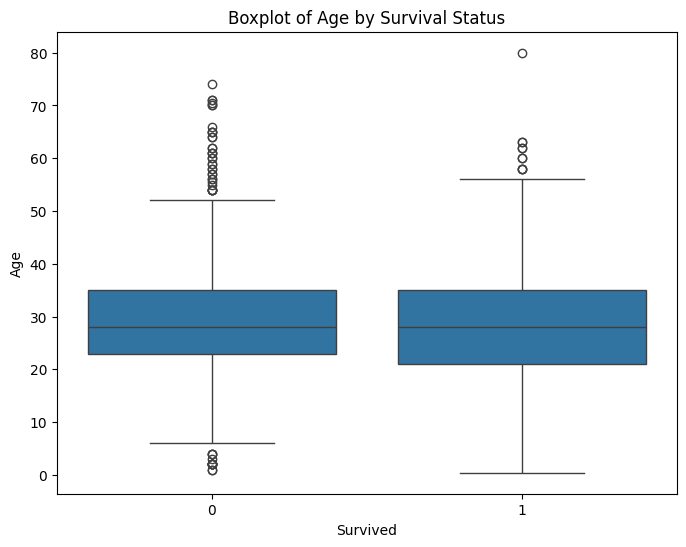

In [66]:
# Boxplot of Age by Survival Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Boxplot of Age by Survival Status')
plt.show()

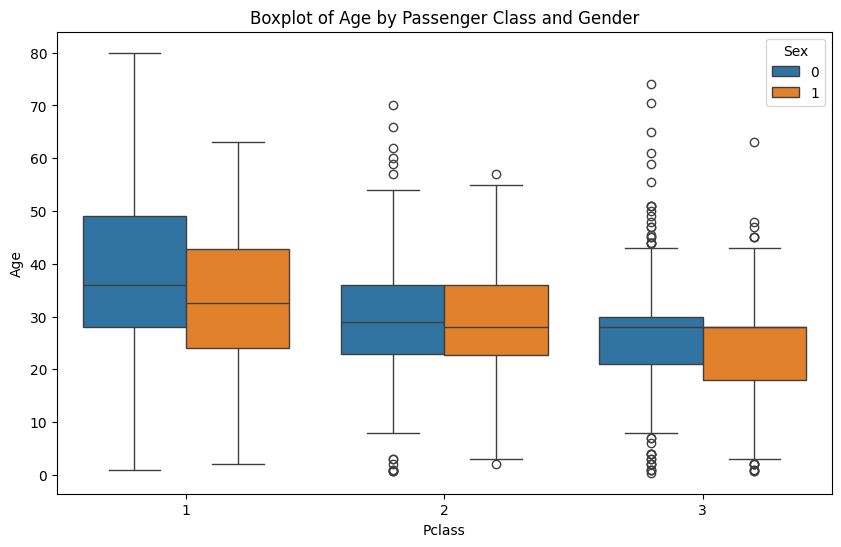

In [67]:
# Boxplot of Age by Passenger Class and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_data)
plt.title('Boxplot of Age by Passenger Class and Gender')
plt.show()

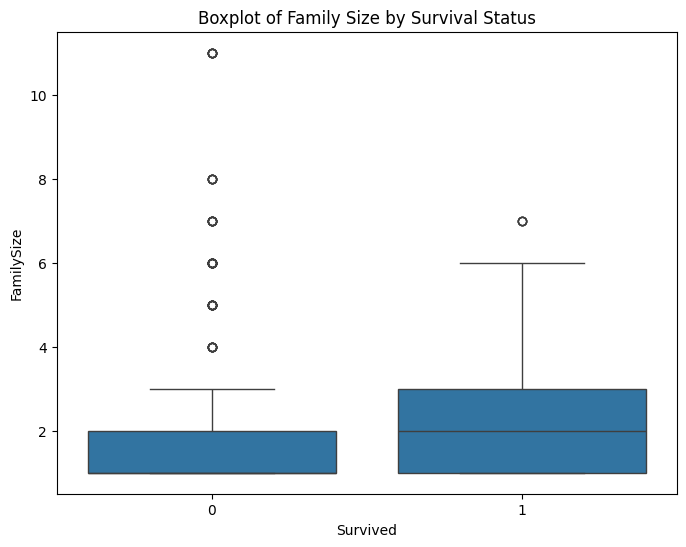

In [68]:
# Boxplot of Family Size by Survival Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='FamilySize', data=titanic_data)
plt.title('Boxplot of Family Size by Survival Status')
plt.show()

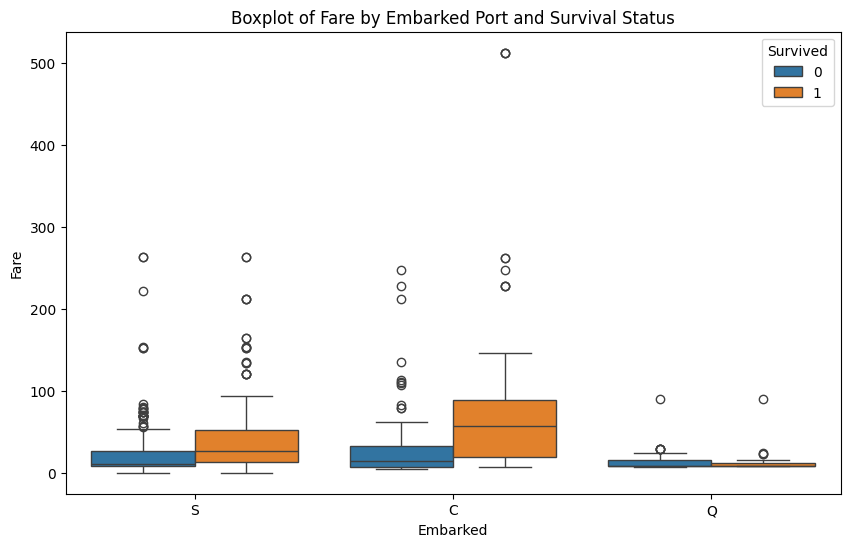

In [69]:
# Boxplot of Fare by Embarked Port and Survival Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=titanic_data)
plt.title('Boxplot of Fare by Embarked Port and Survival Status')
plt.show()